# <center> 👉 class_13_3 » _Pose Estimation (Ⅲ)_ </center>   

# Pose Estimation w/ MediaPipe
https://www.analyticsvidhya.com/blog/2021/05/pose-estimation-using-opencv/  
https://chuoling.github.io/mediapipe/  

## ■ Images

In [1]:
import cv2
import mediapipe as mp
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose 

def plt_imshow(title='image', img=None, figsize=(5 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

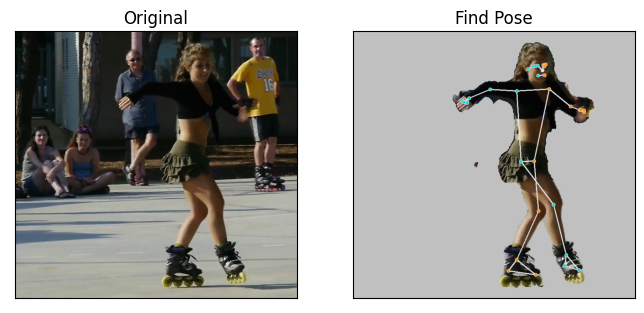

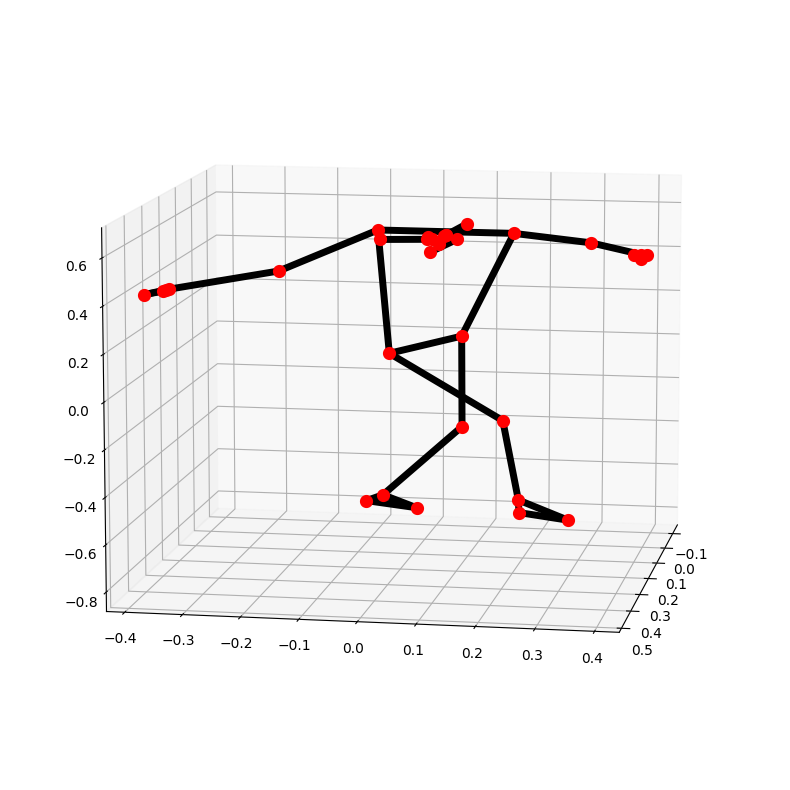

In [3]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

# IMAGE_FILES = ['./images/CV/pose_man.png']
IMAGE_FILES = ['./pose_est/skate.jpg']
BG_COLOR = (192, 192, 192)  # gray
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
    for idx, file in enumerate(IMAGE_FILES):
        image = cv2.imread(file)
        image_height, image_width, _ = image.shape
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        if not results.pose_landmarks:
            continue
#         print(f'Nose coordinates: ('
#             f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
#             f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_height})'
#         )

        annotated_image = image.copy()
        # Split the image. To improve the division around the boundary, consider applying a co-two-way filter to the "results.segmentation_mask" with the "image".
        # 이미지를 분할합니다. 경계 주변의 분할을 개선하려면 "image"가 있는 "results.segmentation_mask"에 공동 양방향 필터를 적용하는 것이 좋습니다.
        condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
        bg_image = np.zeros(image.shape, dtype=np.uint8)
        bg_image[:] = BG_COLOR
        annotated_image = np.where(condition, annotated_image, bg_image)
        mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
#         cv2.imwrite('./results/pose_body_annotated_image' + str(idx) + '.png', annotated_image)
        plt_imshow(["Original", "Find Pose"], [image, annotated_image], figsize=(8,5))
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS) # draw pose_world_landmarks


In [4]:
import cv2
import mediapipe as mp
import time

mpPose = mp.solutions.pose
pose = mpPose.Pose()
mpDraw = mp.solutions.drawing_utils

#cap = cv2.VideoCapture(0)
# cap = cv2.VideoCapture('./cv_data/pose_est/pose_push-up.gif')
cap = cv2.VideoCapture('./pose_est/pose_dance.mp4')
pTime = 0

while True:
    success, img = cap.read()
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_org = imgRGB.copy()
    results = pose.process(imgRGB)
#     print(results.pose_landmarks)
    if results.pose_landmarks:
        mpDraw.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS)
        for id, lm in enumerate(results.pose_landmarks.landmark):
            h, w,c = img.shape
            print(id, lm)
            cx, cy = int(lm.x*w), int(lm.y*h)
            cv2.circle(img, (cx, cy), 5, (255,0,0), cv2.FILLED)

        cTime = time.time()
        fps = 1/(cTime-pTime)
        pTime = cTime

    cv2.putText(img, str(int(fps)), (50,50), cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0), 3)
    cv2.imshow("Org", img_org)
    cv2.imshow("Image", img)
    if cv2.waitKey(10) & 0xFF == 27:
        break
cap.release()
cv2.destroyAllWindows()

0 x: 0.5257077813148499
y: 0.2964199185371399
z: -0.3154321014881134
visibility: 0.999996542930603

1 x: 0.5308080315589905
y: 0.28512242436408997
z: -0.30469468235969543
visibility: 0.9999877214431763

2 x: 0.5339299440383911
y: 0.2849257290363312
z: -0.3046986758708954
visibility: 0.9999866485595703

3 x: 0.5364588499069214
y: 0.28486594557762146
z: -0.30474308133125305
visibility: 0.9999865293502808

4 x: 0.5218790769577026
y: 0.2855122685432434
z: -0.30138230323791504
visibility: 0.9999877214431763

5 x: 0.5192523002624512
y: 0.2856957018375397
z: -0.30142733454704285
visibility: 0.9999878406524658

6 x: 0.5172140598297119
y: 0.2859096825122833
z: -0.30146265029907227
visibility: 0.9999891519546509

7 x: 0.5417580008506775
y: 0.29035454988479614
z: -0.219920352101326
visibility: 0.9999791383743286

8 x: 0.5160174369812012
y: 0.2927328944206238
z: -0.2042774260044098
visibility: 0.9999788999557495

9 x: 0.5326746702194214
y: 0.3096979856491089
z: -0.28211724758148193
visibility: 0.9

0 x: 0.5304694771766663
y: 0.29850420355796814
z: -0.2358168363571167
visibility: 0.999996542930603

1 x: 0.5348164439201355
y: 0.28637197613716125
z: -0.22296908497810364
visibility: 0.9999877214431763

2 x: 0.537451982498169
y: 0.2860923409461975
z: -0.22298315167427063
visibility: 0.9999871253967285

3 x: 0.5395781993865967
y: 0.28593316674232483
z: -0.22297687828540802
visibility: 0.9999868273735046

4 x: 0.5270370244979858
y: 0.28752416372299194
z: -0.22166863083839417
visibility: 0.9999872446060181

5 x: 0.5245898962020874
y: 0.2881071865558624
z: -0.22168119251728058
visibility: 0.9999872446060181

6 x: 0.5223401784896851
y: 0.2886418104171753
z: -0.22168812155723572
visibility: 0.999988317489624

7 x: 0.5447642207145691
y: 0.2918853163719177
z: -0.13974414765834808
visibility: 0.9999783039093018

8 x: 0.5203524827957153
y: 0.2946664094924927
z: -0.1337583065032959
visibility: 0.999975860118866

9 x: 0.5372419953346252
y: 0.3115057945251465
z: -0.2042674571275711
visibility: 0.9

0 x: 0.5305207967758179
y: 0.30055856704711914
z: -0.2406977415084839
visibility: 0.9999962449073792

1 x: 0.5348644852638245
y: 0.28825441002845764
z: -0.22828276455402374
visibility: 0.9999868869781494

2 x: 0.5375696420669556
y: 0.28795045614242554
z: -0.22829270362854004
visibility: 0.9999865293502808

3 x: 0.5396727919578552
y: 0.28770574927330017
z: -0.2282838523387909
visibility: 0.9999861717224121

4 x: 0.5267991423606873
y: 0.2894870340824127
z: -0.22722390294075012
visibility: 0.9999860525131226

5 x: 0.524307131767273
y: 0.2900860905647278
z: -0.22723889350891113
visibility: 0.9999861717224121

6 x: 0.5221165418624878
y: 0.29054760932922363
z: -0.22724559903144836
visibility: 0.9999870657920837

7 x: 0.5447900295257568
y: 0.2935740649700165
z: -0.1449125111103058
visibility: 0.9999756813049316

8 x: 0.5201447606086731
y: 0.2964833080768585
z: -0.1399480253458023
visibility: 0.9999721050262451

9 x: 0.5371705889701843
y: 0.31331008672714233
z: -0.2088536024093628
visibility: 

0 x: 0.5306357145309448
y: 0.30047133564949036
z: -0.23020529747009277
visibility: 0.9999963641166687

1 x: 0.5349025130271912
y: 0.28814369440078735
z: -0.2159946858882904
visibility: 0.9999874830245972

2 x: 0.5376349687576294
y: 0.28783509135246277
z: -0.21600449085235596
visibility: 0.999987006187439

3 x: 0.5397157669067383
y: 0.28759682178497314
z: -0.2160060703754425
visibility: 0.9999867677688599

4 x: 0.5268805027008057
y: 0.2893178462982178
z: -0.21662354469299316
visibility: 0.9999868869781494

5 x: 0.5243942737579346
y: 0.2898969054222107
z: -0.2166362702846527
visibility: 0.9999868869781494

6 x: 0.5221055746078491
y: 0.2903710603713989
z: -0.21664240956306458
visibility: 0.9999878406524658

7 x: 0.5447193384170532
y: 0.29342418909072876
z: -0.12653478980064392
visibility: 0.9999759197235107

8 x: 0.519989013671875
y: 0.2963597774505615
z: -0.12999090552330017
visibility: 0.9999740123748779

9 x: 0.5371419787406921
y: 0.3132564127445221
z: -0.1962135136127472
visibility: 0

0 x: 0.5331277847290039
y: 0.30386751890182495
z: -0.27415263652801514
visibility: 0.9999961256980896

1 x: 0.5367347002029419
y: 0.2912333905696869
z: -0.26003843545913696
visibility: 0.9999871253967285

2 x: 0.5388647317886353
y: 0.2909776568412781
z: -0.26004284620285034
visibility: 0.9999865293502808

3 x: 0.5409575700759888
y: 0.29060953855514526
z: -0.2600552439689636
visibility: 0.9999864101409912

4 x: 0.5290523171424866
y: 0.29193592071533203
z: -0.26463866233825684
visibility: 0.9999866485595703

5 x: 0.5261532664299011
y: 0.29224446415901184
z: -0.26467281579971313
visibility: 0.9999868273735046

6 x: 0.5237609148025513
y: 0.2924048602581024
z: -0.2646709084510803
visibility: 0.999987781047821

7 x: 0.5454750657081604
y: 0.29625508189201355
z: -0.1646529585123062
visibility: 0.9999731779098511

8 x: 0.5203597545623779
y: 0.29951730370521545
z: -0.18567217886447906
visibility: 0.9999747276306152

9 x: 0.5386719703674316
y: 0.3163861930370331
z: -0.23715324699878693
visibility

0 x: 0.5369578003883362
y: 0.3097398281097412
z: -0.2224467247724533
visibility: 0.9999762773513794

1 x: 0.5398940443992615
y: 0.2979174852371216
z: -0.20703986287117004
visibility: 0.9999382495880127

2 x: 0.5420962572097778
y: 0.2979002594947815
z: -0.20705628395080566
visibility: 0.9999421238899231

3 x: 0.5446498394012451
y: 0.2979399859905243
z: -0.20705434679985046
visibility: 0.9999352693557739

4 x: 0.5326638221740723
y: 0.29813352227211
z: -0.210734561085701
visibility: 0.9999178647994995

5 x: 0.5297901034355164
y: 0.2985062599182129
z: -0.2107813060283661
visibility: 0.9999309182167053

6 x: 0.5271161794662476
y: 0.2989301383495331
z: -0.21079659461975098
visibility: 0.9999175071716309

7 x: 0.5494468808174133
y: 0.303798645734787
z: -0.10917894542217255
visibility: 0.999873161315918

8 x: 0.5233424305915833
y: 0.30615347623825073
z: -0.12733601033687592
visibility: 0.999824583530426

9 x: 0.5419713854789734
y: 0.3231964409351349
z: -0.18525460362434387
visibility: 0.999963

0 x: 0.5339165329933167
y: 0.31361711025238037
z: -0.189570352435112
visibility: 0.9999417662620544

1 x: 0.5374168753623962
y: 0.30017104744911194
z: -0.1765308380126953
visibility: 0.999819278717041

2 x: 0.5401726961135864
y: 0.29931607842445374
z: -0.1765594780445099
visibility: 0.9998350143432617

3 x: 0.5429193377494812
y: 0.29858386516571045
z: -0.1765567809343338
visibility: 0.9998217225074768

4 x: 0.5298619866371155
y: 0.3021256923675537
z: -0.17834489047527313
visibility: 0.9997503757476807

5 x: 0.5275302529335022
y: 0.30270835757255554
z: -0.1783992350101471
visibility: 0.9997923970222473

6 x: 0.5252643823623657
y: 0.30322518944740295
z: -0.17843283712863922
visibility: 0.9997578859329224

7 x: 0.547971248626709
y: 0.30347490310668945
z: -0.09174150228500366
visibility: 0.9996953010559082

8 x: 0.5226539373397827
y: 0.30894359946250916
z: -0.0956198200583458
visibility: 0.9995972514152527

9 x: 0.5400184988975525
y: 0.32553258538246155
z: -0.15495164692401886
visibility: 

0 x: 0.5376461744308472
y: 0.3027993440628052
z: -0.28201043605804443
visibility: 0.9999529123306274

1 x: 0.5401473641395569
y: 0.2913826107978821
z: -0.26558417081832886
visibility: 0.9998577833175659

2 x: 0.542617917060852
y: 0.29094189405441284
z: -0.26558762788772583
visibility: 0.9998704791069031

3 x: 0.5451077222824097
y: 0.2904936373233795
z: -0.2655937671661377
visibility: 0.9998614192008972

4 x: 0.53370600938797
y: 0.29384124279022217
z: -0.27071669697761536
visibility: 0.9998028874397278

5 x: 0.5317180752754211
y: 0.29525306820869446
z: -0.27077537775039673
visibility: 0.9998355507850647

6 x: 0.5298426151275635
y: 0.2966659665107727
z: -0.2708192467689514
visibility: 0.999804675579071

7 x: 0.5505855679512024
y: 0.29781240224838257
z: -0.15972700715065002
visibility: 0.999753475189209

8 x: 0.5297064781188965
y: 0.30607983469963074
z: -0.1803952157497406
visibility: 0.9996957182884216

9 x: 0.544380784034729
y: 0.31543391942977905
z: -0.24100807309150696
visibility: 0.9

0 x: 0.5538912415504456
y: 0.30639851093292236
z: -0.27708935737609863
visibility: 0.9999658465385437

1 x: 0.5592164993286133
y: 0.2961834669113159
z: -0.2647433280944824
visibility: 0.9999006986618042

2 x: 0.561662495136261
y: 0.29736173152923584
z: -0.2647293210029602
visibility: 0.9999083876609802

3 x: 0.5641051530838013
y: 0.2984585762023926
z: -0.2647157907485962
visibility: 0.9999019503593445

4 x: 0.5511028170585632
y: 0.2930228114128113
z: -0.2645116448402405
visibility: 0.9998630285263062

5 x: 0.5479391813278198
y: 0.292242169380188
z: -0.2645568251609802
visibility: 0.9998849630355835

6 x: 0.544948935508728
y: 0.2914319634437561
z: -0.2645551562309265
visibility: 0.9998642206192017

7 x: 0.5680285096168518
y: 0.3065902888774872
z: -0.17490854859352112
visibility: 0.9998164176940918

8 x: 0.5409449934959412
y: 0.2974916994571686
z: -0.17523866891860962
visibility: 0.9997909665107727

9 x: 0.5576029419898987
y: 0.32372063398361206
z: -0.24249275028705597
visibility: 0.9999

0 x: 0.524962306022644
y: 0.2809753715991974
z: -0.2251640111207962
visibility: 0.9999763369560242

1 x: 0.5296620726585388
y: 0.27037644386291504
z: -0.22717013955116272
visibility: 0.9999319314956665

2 x: 0.5322026014328003
y: 0.270386278629303
z: -0.22718378901481628
visibility: 0.999937117099762

3 x: 0.5347765684127808
y: 0.2704216539859772
z: -0.2272164523601532
visibility: 0.9999335408210754

4 x: 0.5232158899307251
y: 0.2699776887893677
z: -0.21061170101165771
visibility: 0.9999055862426758

5 x: 0.5212856531143188
y: 0.26979613304138184
z: -0.21058706939220428
visibility: 0.9999186396598816

6 x: 0.5190943479537964
y: 0.26946261525154114
z: -0.21054425835609436
visibility: 0.9999053478240967

7 x: 0.5416901707649231
y: 0.27544817328453064
z: -0.17905476689338684
visibility: 0.9998766779899597

8 x: 0.520155668258667
y: 0.27395114302635193
z: -0.11468932777643204
visibility: 0.9998550415039062

9 x: 0.5296062231063843
y: 0.29511573910713196
z: -0.20894937217235565
visibility: 

0 x: 0.5045009851455688
y: 0.2862171530723572
z: -0.2449541985988617
visibility: 0.9999791979789734

1 x: 0.509918749332428
y: 0.276435524225235
z: -0.24212560057640076
visibility: 0.9999475479125977

2 x: 0.5123252868652344
y: 0.2775020897388458
z: -0.24214689433574677
visibility: 0.9999522566795349

3 x: 0.5146735906600952
y: 0.2785521149635315
z: -0.24228355288505554
visibility: 0.9999504089355469

4 x: 0.5036647319793701
y: 0.27334392070770264
z: -0.22540584206581116
visibility: 0.9999260306358337

5 x: 0.5017617344856262
y: 0.27236804366111755
z: -0.22535045444965363
visibility: 0.9999289512634277

6 x: 0.49993234872817993
y: 0.2717830538749695
z: -0.22539052367210388
visibility: 0.9999134540557861

7 x: 0.5192285776138306
y: 0.2874121367931366
z: -0.1841961294412613
visibility: 0.9999160170555115

8 x: 0.49929705262184143
y: 0.27755218744277954
z: -0.10353568941354752
visibility: 0.9998638033866882

9 x: 0.5076776742935181
y: 0.30309003591537476
z: -0.22072140872478485
visibility

0 x: 0.481581449508667
y: 0.30480989813804626
z: -0.1955273449420929
visibility: 0.9999709725379944

1 x: 0.4851946234703064
y: 0.29352134466171265
z: -0.19624069333076477
visibility: 0.9999479651451111

2 x: 0.4877041280269623
y: 0.2944941818714142
z: -0.19627808034420013
visibility: 0.9999527931213379

3 x: 0.4902801513671875
y: 0.2959554195404053
z: -0.19638384878635406
visibility: 0.9999523162841797

4 x: 0.4795796871185303
y: 0.29244551062583923
z: -0.1786176860332489
visibility: 0.9999309182167053

5 x: 0.4778551459312439
y: 0.29236727952957153
z: -0.1785869002342224
visibility: 0.9999231100082397

6 x: 0.4760492444038391
y: 0.29233530163764954
z: -0.1785372942686081
visibility: 0.9998983144760132

7 x: 0.49859482049942017
y: 0.30489176511764526
z: -0.15016944706439972
visibility: 0.999937117099762

8 x: 0.4787921905517578
y: 0.29748111963272095
z: -0.0707411915063858
visibility: 0.9998472929000854

9 x: 0.48747047781944275
y: 0.31927162408828735
z: -0.1751190423965454
visibility

0 x: 0.4880801737308502
y: 0.29432666301727295
z: -0.1450088620185852
visibility: 0.9999686479568481

1 x: 0.4920041561126709
y: 0.2831622064113617
z: -0.1371854841709137
visibility: 0.9999505877494812

2 x: 0.49444255232810974
y: 0.2831544876098633
z: -0.13725246489048004
visibility: 0.9999555945396423

3 x: 0.49684691429138184
y: 0.2834157943725586
z: -0.1373414397239685
visibility: 0.999954879283905

4 x: 0.48609986901283264
y: 0.2835346758365631
z: -0.12560872733592987
visibility: 0.9999359846115112

5 x: 0.4843314290046692
y: 0.28383463621139526
z: -0.12558762729167938
visibility: 0.9999250173568726

6 x: 0.4824957847595215
y: 0.2840380072593689
z: -0.12555190920829773
visibility: 0.9999023079872131

7 x: 0.5026754140853882
y: 0.29003432393074036
z: -0.075037881731987
visibility: 0.999946117401123

8 x: 0.483646959066391
y: 0.28939351439476013
z: -0.022029610350728035
visibility: 0.9998608231544495

9 x: 0.49325722455978394
y: 0.3052152097225189
z: -0.12140931189060211
visibility:

0 x: 0.5067311525344849
y: 0.304636687040329
z: -0.10046546161174774
visibility: 0.9998851418495178

1 x: 0.5122960805892944
y: 0.2951675057411194
z: -0.10479049384593964
visibility: 0.9998989105224609

2 x: 0.5140542984008789
y: 0.2955039441585541
z: -0.10484848916530609
visibility: 0.9998849630355835

3 x: 0.5160064697265625
y: 0.29584264755249023
z: -0.10486297309398651
visibility: 0.999898374080658

4 x: 0.5098364949226379
y: 0.29358282685279846
z: -0.08480941504240036
visibility: 0.9998680949211121

5 x: 0.5097595453262329
y: 0.2928920388221741
z: -0.08481890708208084
visibility: 0.9998177886009216

6 x: 0.5097936391830444
y: 0.29202428460121155
z: -0.08481204509735107
visibility: 0.9998259544372559

7 x: 0.5242789387702942
y: 0.30325067043304443
z: -0.09362252056598663
visibility: 0.9998540878295898

8 x: 0.5166527628898621
y: 0.29690590500831604
z: -0.0015368459280580282
visibility: 0.9996748566627502

9 x: 0.51015305519104
y: 0.314638614654541
z: -0.09394408017396927
visibility

0 x: 0.5045363903045654
y: 0.29908323287963867
z: -0.12613524496555328
visibility: 0.9999184608459473

1 x: 0.5104398727416992
y: 0.29078948497772217
z: -0.12474159151315689
visibility: 0.9999275207519531

2 x: 0.512975811958313
y: 0.2918247580528259
z: -0.12479877471923828
visibility: 0.9999181032180786

3 x: 0.5158728361129761
y: 0.29296624660491943
z: -0.12485172599554062
visibility: 0.999925434589386

4 x: 0.5048703551292419
y: 0.28847816586494446
z: -0.10829514265060425
visibility: 0.9999067187309265

5 x: 0.5034863948822021
y: 0.2878533601760864
z: -0.10828373581171036
visibility: 0.9998704791069031

6 x: 0.5021070241928101
y: 0.28710323572158813
z: -0.10822154581546783
visibility: 0.9998766183853149

7 x: 0.5233079791069031
y: 0.3034484386444092
z: -0.08287925273180008
visibility: 0.9998968839645386

8 x: 0.5043660402297974
y: 0.2935560941696167
z: -0.009652302600443363
visibility: 0.9997743964195251

9 x: 0.5077714323997498
y: 0.3156595528125763
z: -0.10992705821990967
visibili

0 x: 0.4927392899990082
y: 0.30777308344841003
z: -0.14415358006954193
visibility: 0.9999343752861023

1 x: 0.4953725337982178
y: 0.2946619391441345
z: -0.14460167288780212
visibility: 0.9999402761459351

2 x: 0.4976881444454193
y: 0.2936530113220215
z: -0.14460667967796326
visibility: 0.9999342560768127

3 x: 0.5001100301742554
y: 0.2929564118385315
z: -0.14468660950660706
visibility: 0.9999390244483948

4 x: 0.4892762303352356
y: 0.2983144223690033
z: -0.12736578285694122
visibility: 0.9999232888221741

5 x: 0.4872511327266693
y: 0.299855500459671
z: -0.12735655903816223
visibility: 0.9998950958251953

6 x: 0.4852147698402405
y: 0.3012923002243042
z: -0.127395361661911
visibility: 0.9998959302902222

7 x: 0.5072163343429565
y: 0.29925408959388733
z: -0.08989410102367401
visibility: 0.9999219179153442

8 x: 0.4855121672153473
y: 0.30786260962486267
z: -0.03537825495004654
visibility: 0.999817430973053

9 x: 0.4984718859195709
y: 0.3209555447101593
z: -0.12555378675460815
visibility: 0

0 x: 0.483931303024292
y: 0.3168775141239166
z: -0.1748526394367218
visibility: 0.9999496340751648

1 x: 0.48682475090026855
y: 0.3032216429710388
z: -0.17148348689079285
visibility: 0.9999538660049438

2 x: 0.4893048405647278
y: 0.3015612065792084
z: -0.17148737609386444
visibility: 0.9999499917030334

3 x: 0.49191778898239136
y: 0.300020694732666
z: -0.17157980799674988
visibility: 0.9999535083770752

4 x: 0.48000049591064453
y: 0.3081762194633484
z: -0.15870359539985657
visibility: 0.9999389052391052

5 x: 0.4776221215724945
y: 0.3099820017814636
z: -0.15869691967964172
visibility: 0.9999166131019592

6 x: 0.47523170709609985
y: 0.3115558624267578
z: -0.15871302783489227
visibility: 0.9999145865440369

7 x: 0.49834027886390686
y: 0.30463460087776184
z: -0.12397000938653946
visibility: 0.9999420642852783

8 x: 0.47487202286720276
y: 0.31768572330474854
z: -0.06697656214237213
visibility: 0.9998556971549988

9 x: 0.4904988408088684
y: 0.32757726311683655
z: -0.15588070452213287
visibi

0 x: 0.48403677344322205
y: 0.3345758616924286
z: -0.21815446019172668
visibility: 0.9999595880508423

1 x: 0.48749470710754395
y: 0.3212721645832062
z: -0.21248559653759003
visibility: 0.9999620318412781

2 x: 0.49035510420799255
y: 0.3204875588417053
z: -0.2125224769115448
visibility: 0.9999597668647766

3 x: 0.4933342933654785
y: 0.31988954544067383
z: -0.21262454986572266
visibility: 0.9999632239341736

4 x: 0.48039525747299194
y: 0.3226689398288727
z: -0.20325954258441925
visibility: 0.9999463558197021

5 x: 0.4780925214290619
y: 0.3228374719619751
z: -0.20323829352855682
visibility: 0.999923825263977

6 x: 0.4755319058895111
y: 0.32297345995903015
z: -0.2032002955675125
visibility: 0.9999178647994995

7 x: 0.4994555115699768
y: 0.32495278120040894
z: -0.1501488983631134
visibility: 0.9999563694000244

8 x: 0.4745752215385437
y: 0.3280336558818817
z: -0.10786782205104828
visibility: 0.9998747110366821

9 x: 0.48975682258605957
y: 0.34794872999191284
z: -0.19225361943244934
visibil

0 x: 0.47183161973953247
y: 0.3423413336277008
z: -0.19712069630622864
visibility: 0.9998917579650879

1 x: 0.47532790899276733
y: 0.3286077380180359
z: -0.19890530407428741
visibility: 0.9998976588249207

2 x: 0.4775713086128235
y: 0.3286187946796417
z: -0.1989557445049286
visibility: 0.9999055862426758

3 x: 0.4795745015144348
y: 0.3285314738750458
z: -0.19903664290905
visibility: 0.9999333620071411

4 x: 0.47022414207458496
y: 0.3282856047153473
z: -0.1830834448337555
visibility: 0.9997656345367432

5 x: 0.4692944884300232
y: 0.3284643292427063
z: -0.18310508131980896
visibility: 0.9996282458305359

6 x: 0.46841779351234436
y: 0.32844972610473633
z: -0.18312183022499084
visibility: 0.999619722366333

7 x: 0.484578937292099
y: 0.3354494869709015
z: -0.16088280081748962
visibility: 0.9999377131462097

8 x: 0.47321629524230957
y: 0.3372229337692261
z: -0.10458873212337494
visibility: 0.9995740056037903

9 x: 0.47485464811325073
y: 0.35601091384887695
z: -0.1851654350757599
visibility: 

0 x: 0.47048911452293396
y: 0.3314943015575409
z: -0.15534813702106476
visibility: 0.9998006820678711

1 x: 0.47538286447525024
y: 0.318695604801178
z: -0.14684365689754486
visibility: 0.999784529209137

2 x: 0.4771957993507385
y: 0.31851333379745483
z: -0.14690986275672913
visibility: 0.9998142123222351

3 x: 0.47892141342163086
y: 0.31853187084198
z: -0.14696843922138214
visibility: 0.9998641610145569

4 x: 0.4709645211696625
y: 0.3186575770378113
z: -0.13893315196037292
visibility: 0.9995816946029663

5 x: 0.4699876308441162
y: 0.3185374140739441
z: -0.13891443610191345
visibility: 0.9994134902954102

6 x: 0.4689420759677887
y: 0.3185526430606842
z: -0.13892151415348053
visibility: 0.999399721622467

7 x: 0.4824182093143463
y: 0.32565173506736755
z: -0.08414961397647858
visibility: 0.999843418598175

8 x: 0.46933722496032715
y: 0.32585853338241577
z: -0.04891958087682724
visibility: 0.9990391731262207

9 x: 0.4742436408996582
y: 0.34140709042549133
z: -0.13143615424633026
visibility

0 x: 0.4632359445095062
y: 0.29422619938850403
z: -0.10526619851589203
visibility: 0.9997349381446838

1 x: 0.4669951796531677
y: 0.2844739854335785
z: -0.10309479385614395
visibility: 0.9996895790100098

2 x: 0.4685242772102356
y: 0.28469279408454895
z: -0.10311256349086761
visibility: 0.9997025728225708

3 x: 0.4700952470302582
y: 0.28468504548072815
z: -0.10318920761346817
visibility: 0.9997692108154297

4 x: 0.46397727727890015
y: 0.28331494331359863
z: -0.0888419821858406
visibility: 0.9994632005691528

5 x: 0.4635617733001709
y: 0.2828485369682312
z: -0.08883215487003326
visibility: 0.9992328882217407

6 x: 0.46315860748291016
y: 0.28220781683921814
z: -0.08889827877283096
visibility: 0.9991962313652039

7 x: 0.4761298596858978
y: 0.2982572913169861
z: -0.07067345082759857
visibility: 0.9997349977493286

8 x: 0.4664627015590668
y: 0.29250192642211914
z: -0.005752377212047577
visibility: 0.9987130165100098

9 x: 0.46701034903526306
y: 0.3063932955265045
z: -0.09185242652893066
vis

0 x: 0.4552673399448395
y: 0.2979934811592102
z: -0.040040574967861176
visibility: 0.9994292259216309

1 x: 0.45826849341392517
y: 0.2872566878795624
z: -0.04198724776506424
visibility: 0.9992896914482117

2 x: 0.459987074136734
y: 0.2866267263889313
z: -0.04197274520993233
visibility: 0.9992651343345642

3 x: 0.4617365002632141
y: 0.2855813801288605
z: -0.04203050956130028
visibility: 0.9994699358940125

4 x: 0.45494723320007324
y: 0.2877870202064514
z: -0.028287190943956375
visibility: 0.998831033706665

5 x: 0.45434489846229553
y: 0.2877877354621887
z: -0.028308022767305374
visibility: 0.9982958436012268

6 x: 0.45380154252052307
y: 0.28748199343681335
z: -0.028351619839668274
visibility: 0.9983864426612854

7 x: 0.46840038895606995
y: 0.2908310890197754
z: -0.02017206698656082
visibility: 0.9994721412658691

8 x: 0.4584970474243164
y: 0.2916250228881836
z: 0.042272768914699554
visibility: 0.9980552792549133

9 x: 0.4610825479030609
y: 0.3077567517757416
z: -0.02895228937268257
visi

0 x: 0.4610656797885895
y: 0.29320186376571655
z: -0.10230697691440582
visibility: 0.9991707801818848

1 x: 0.46459683775901794
y: 0.2855442762374878
z: -0.09925530105829239
visibility: 0.9988520741462708

2 x: 0.4668167233467102
y: 0.28509172797203064
z: -0.09918118268251419
visibility: 0.9987857341766357

3 x: 0.46914976835250854
y: 0.28453317284584045
z: -0.09923733025789261
visibility: 0.9991641640663147

4 x: 0.4595819413661957
y: 0.28759923577308655
z: -0.08715614676475525
visibility: 0.9981751441955566

5 x: 0.45829343795776367
y: 0.2887279689311981
z: -0.08718297630548477
visibility: 0.9972386956214905

6 x: 0.4569271206855774
y: 0.2898167669773102
z: -0.08736133575439453
visibility: 0.9974352121353149

7 x: 0.4753844738006592
y: 0.2911635637283325
z: -0.05523795634508133
visibility: 0.9990949630737305

8 x: 0.4588165879249573
y: 0.2977403700351715
z: -0.003985946998000145
visibility: 0.9972012042999268

9 x: 0.4677577614784241
y: 0.3018881678581238
z: -0.08656657487154007
visi

0 x: 0.4515882432460785
y: 0.32035520672798157
z: -0.07167074084281921
visibility: 0.9994230270385742

1 x: 0.45410221815109253
y: 0.3103894889354706
z: -0.08128967136144638
visibility: 0.9991888403892517

2 x: 0.45585864782333374
y: 0.30914056301116943
z: -0.0812070444226265
visibility: 0.9991570711135864

3 x: 0.4576497972011566
y: 0.30767157673835754
z: -0.0811925157904625
visibility: 0.9993982315063477

4 x: 0.4509102702140808
y: 0.3129781484603882
z: -0.0604301318526268
visibility: 0.9987272620201111

5 x: 0.45039620995521545
y: 0.3138215243816376
z: -0.060445256531238556
visibility: 0.9981083869934082

6 x: 0.4498423933982849
y: 0.31444868445396423
z: -0.06056368350982666
visibility: 0.9982113838195801

7 x: 0.4683150351047516
y: 0.3099149167537689
z: -0.07030206173658371
visibility: 0.9993824362754822

8 x: 0.45525670051574707
y: 0.318564236164093
z: -0.0007482728688046336
visibility: 0.998056948184967

9 x: 0.459057480096817
y: 0.3277322053909302
z: -0.06509194523096085
visibil

0 x: 0.44880932569503784
y: 0.34133556485176086
z: -0.0935310572385788
visibility: 0.9995677471160889

1 x: 0.44997626543045044
y: 0.3302057981491089
z: -0.10054618120193481
visibility: 0.9993836283683777

2 x: 0.45181459188461304
y: 0.3278590738773346
z: -0.10049047321081161
visibility: 0.9993919134140015

3 x: 0.4537146985530853
y: 0.325260192155838
z: -0.10053323209285736
visibility: 0.9995310306549072

4 x: 0.44612541794776917
y: 0.3354725241661072
z: -0.08608222007751465
visibility: 0.9990397691726685

5 x: 0.4451808035373688
y: 0.3368448317050934
z: -0.08609598129987717
visibility: 0.998651921749115

6 x: 0.44426530599594116
y: 0.33803585171699524
z: -0.08616861701011658
visibility: 0.9986671805381775

7 x: 0.4620770812034607
y: 0.32451343536376953
z: -0.08451526612043381
visibility: 0.9995689392089844

8 x: 0.44864171743392944
y: 0.34054988622665405
z: -0.021889420226216316
visibility: 0.998595118522644

9 x: 0.45613789558410645
y: 0.343567430973053
z: -0.08914582431316376
visib

0 x: 0.46549302339553833
y: 0.33549821376800537
z: -0.2657201886177063
visibility: 0.9996647238731384

1 x: 0.47031036019325256
y: 0.32304245233535767
z: -0.2642046809196472
visibility: 0.9995481371879578

2 x: 0.4735787510871887
y: 0.32038450241088867
z: -0.2642059028148651
visibility: 0.9995657801628113

3 x: 0.4767802655696869
y: 0.3181333839893341
z: -0.2642851173877716
visibility: 0.9996612668037415

4 x: 0.4623948633670807
y: 0.3229771852493286
z: -0.25360316038131714
visibility: 0.9992584586143494

5 x: 0.4605134427547455
y: 0.32240262627601624
z: -0.2536516785621643
visibility: 0.9989722967147827

6 x: 0.4587157666683197
y: 0.3216303884983063
z: -0.25367215275764465
visibility: 0.9989470839500427

7 x: 0.48280102014541626
y: 0.31949377059936523
z: -0.2116328477859497
visibility: 0.9997034072875977

8 x: 0.46058860421180725
y: 0.32671424746513367
z: -0.1637573540210724
visibility: 0.998917281627655

9 x: 0.47273916006088257
y: 0.339981347322464
z: -0.2429499626159668
visibility:

0 x: 0.48863816261291504
y: 0.3308139741420746
z: -0.2215161770582199
visibility: 0.9997652173042297

1 x: 0.49244365096092224
y: 0.32029780745506287
z: -0.2116275131702423
visibility: 0.9996804594993591

2 x: 0.4945162236690521
y: 0.3210597336292267
z: -0.21161305904388428
visibility: 0.9996925592422485

3 x: 0.49657994508743286
y: 0.3219446837902069
z: -0.21163861453533173
visibility: 0.9997559785842896

4 x: 0.4861205518245697
y: 0.31597816944122314
z: -0.2094583809375763
visibility: 0.9994859099388123

5 x: 0.48381462693214417
y: 0.31407541036605835
z: -0.2094939649105072
visibility: 0.9992913007736206

6 x: 0.48156172037124634
y: 0.3123931288719177
z: -0.20949003100395203
visibility: 0.9992659091949463

7 x: 0.4988808035850525
y: 0.3274296224117279
z: -0.13130196928977966
visibility: 0.9997836947441101

8 x: 0.4774532914161682
y: 0.3153827488422394
z: -0.1259882003068924
visibility: 0.9992395639419556

9 x: 0.49124661087989807
y: 0.34530195593833923
z: -0.1901334822177887
visibili

0 x: 0.4605788588523865
y: 0.32187944650650024
z: -0.14693723618984222
visibility: 0.9998367428779602

1 x: 0.4639192521572113
y: 0.309946745634079
z: -0.14310050010681152
visibility: 0.9997762441635132

2 x: 0.4667116105556488
y: 0.30902159214019775
z: -0.1430966556072235
visibility: 0.9997873306274414

3 x: 0.46951475739479065
y: 0.3077983558177948
z: -0.1431100070476532
visibility: 0.9998290538787842

4 x: 0.4573522210121155
y: 0.3103328049182892
z: -0.13039027154445648
visibility: 0.9996373653411865

5 x: 0.4554585814476013
y: 0.3108191192150116
z: -0.13040104508399963
visibility: 0.999504804611206

6 x: 0.45377016067504883
y: 0.3111623227596283
z: -0.1304076462984085
visibility: 0.9994779825210571

7 x: 0.47984299063682556
y: 0.3107411861419678
z: -0.09405152499675751
visibility: 0.9998521208763123

8 x: 0.4563615322113037
y: 0.31646424531936646
z: -0.035049647092819214
visibility: 0.9994425177574158

9 x: 0.46806660294532776
y: 0.3331415057182312
z: -0.12703631818294525
visibilit

0 x: 0.5011201500892639
y: 0.343485027551651
z: -0.23273596167564392
visibility: 0.9998846650123596

1 x: 0.5033870935440063
y: 0.33428382873535156
z: -0.216312974691391
visibility: 0.999845027923584

2 x: 0.5046303868293762
y: 0.3352542221546173
z: -0.21635916829109192
visibility: 0.9998512864112854

3 x: 0.5057669878005981
y: 0.33613333106040955
z: -0.21644535660743713
visibility: 0.9998801350593567

4 x: 0.4979003369808197
y: 0.32968953251838684
z: -0.2252584993839264
visibility: 0.9997448325157166

5 x: 0.4953579902648926
y: 0.3277988135814667
z: -0.225271537899971
visibility: 0.9996469616889954

6 x: 0.4927637577056885
y: 0.3258969783782959
z: -0.22524289786815643
visibility: 0.9996161460876465

7 x: 0.5025405883789062
y: 0.33864322304725647
z: -0.10950666666030884
visibility: 0.9998970627784729

8 x: 0.4851440489292145
y: 0.32718175649642944
z: -0.15669086575508118
visibility: 0.9995890855789185

9 x: 0.5001663565635681
y: 0.3572600185871124
z: -0.1930159032344818
visibility: 0.9

0 x: 0.5036505460739136
y: 0.3382515013217926
z: -0.24173986911773682
visibility: 0.9999178051948547

1 x: 0.5054186582565308
y: 0.3425053060054779
z: -0.23159071803092957
visibility: 0.9998917579650879

2 x: 0.5069448351860046
y: 0.3407477140426636
z: -0.23162102699279785
visibility: 0.9998964667320251

3 x: 0.5084801912307739
y: 0.34117305278778076
z: -0.2316608875989914
visibility: 0.9999157786369324

4 x: 0.49991855025291443
y: 0.32940158247947693
z: -0.22658126056194305
visibility: 0.9998173117637634

5 x: 0.4978002905845642
y: 0.32561641931533813
z: -0.22654977440834045
visibility: 0.9997491836547852

6 x: 0.49578243494033813
y: 0.32222574949264526
z: -0.2264898270368576
visibility: 0.9997214078903198

7 x: 0.5102523565292358
y: 0.348796010017395
z: -0.15127816796302795
visibility: 0.9999270439147949

8 x: 0.49309617280960083
y: 0.32699891924858093
z: -0.13390953838825226
visibility: 0.9997037053108215

9 x: 0.5013597011566162
y: 0.35397085547447205
z: -0.2112431824207306
visibil

0 x: 0.4679149091243744
y: 0.3150058090686798
z: -0.13224828243255615
visibility: 0.9999005198478699

1 x: 0.47141847014427185
y: 0.3024570345878601
z: -0.1384645402431488
visibility: 0.9998534321784973

2 x: 0.47398099303245544
y: 0.3014795184135437
z: -0.13852325081825256
visibility: 0.9998663663864136

3 x: 0.47663575410842896
y: 0.3004123568534851
z: -0.13860952854156494
visibility: 0.9998903870582581

4 x: 0.4662865102291107
y: 0.30466556549072266
z: -0.12078823149204254
visibility: 0.9997704029083252

5 x: 0.46498388051986694
y: 0.3052787482738495
z: -0.12074299901723862
visibility: 0.9996787905693054

6 x: 0.46372634172439575
y: 0.3057459890842438
z: -0.12073472887277603
visibility: 0.9996246695518494

7 x: 0.48698335886001587
y: 0.30407029390335083
z: -0.11290587484836578
visibility: 0.9999131560325623

8 x: 0.4688899517059326
y: 0.3095817565917969
z: -0.042500998824834824
visibility: 0.9994530081748962

9 x: 0.47576314210891724
y: 0.3281550705432892
z: -0.1234775185585022
visi

0 x: 0.4602773189544678
y: 0.3338973820209503
z: -0.1364152878522873
visibility: 0.9998775124549866

1 x: 0.4632401466369629
y: 0.314460426568985
z: -0.13296271860599518
visibility: 0.9997947812080383

2 x: 0.46623295545578003
y: 0.3125544786453247
z: -0.1330372393131256
visibility: 0.9998140335083008

3 x: 0.46925419569015503
y: 0.310210645198822
z: -0.1331176459789276
visibility: 0.9998501539230347

4 x: 0.4558226466178894
y: 0.32274991273880005
z: -0.12093126773834229
visibility: 0.9996837973594666

5 x: 0.4538075923919678
y: 0.32451140880584717
z: -0.12089960277080536
visibility: 0.9995378255844116

6 x: 0.4518145024776459
y: 0.32611286640167236
z: -0.12091419845819473
visibility: 0.9994804263114929

7 x: 0.4770117402076721
y: 0.3051770329475403
z: -0.07895322144031525
visibility: 0.9998892545700073

8 x: 0.4539899230003357
y: 0.326437771320343
z: -0.018238959833979607
visibility: 0.9991655349731445

9 x: 0.46896594762802124
y: 0.3397165536880493
z: -0.11243709176778793
visibility:

0 x: 0.4566403329372406
y: 0.36565518379211426
z: -0.1307968944311142
visibility: 0.9998940229415894

1 x: 0.46066078543663025
y: 0.35297638177871704
z: -0.10787465423345566
visibility: 0.9998272061347961

2 x: 0.4632253050804138
y: 0.35282447934150696
z: -0.10799378156661987
visibility: 0.9998342394828796

3 x: 0.46575456857681274
y: 0.3526715934276581
z: -0.1080726608633995
visibility: 0.9998653531074524

4 x: 0.4534006118774414
y: 0.35390201210975647
z: -0.09967348724603653
visibility: 0.9997444152832031

5 x: 0.45081090927124023
y: 0.3545369505882263
z: -0.09973267465829849
visibility: 0.9996252059936523

6 x: 0.4482983946800232
y: 0.35524505376815796
z: -0.0997152328491211
visibility: 0.9995940327644348

7 x: 0.4715910851955414
y: 0.3609364330768585
z: -0.04754426330327988
visibility: 0.999885618686676

8 x: 0.4469660818576813
y: 0.36503610014915466
z: -0.012614632956683636
visibility: 0.9993752837181091

9 x: 0.4617847502231598
y: 0.3796980679035187
z: -0.1018894761800766
visibil

0 x: 0.46197056770324707
y: 0.34233418107032776
z: -0.21329298615455627
visibility: 0.9999262690544128

1 x: 0.4680405259132385
y: 0.3333777189254761
z: -0.1972101777791977
visibility: 0.9998658895492554

2 x: 0.4712788164615631
y: 0.33401304483413696
z: -0.1972152441740036
visibility: 0.9998664855957031

3 x: 0.47376471757888794
y: 0.3344770073890686
z: -0.19724538922309875
visibility: 0.9998862147331238

4 x: 0.45915722846984863
y: 0.3318813145160675
z: -0.1948629468679428
visibility: 0.9998172521591187

5 x: 0.4561588168144226
y: 0.33131909370422363
z: -0.19487248361110687
visibility: 0.9997368454933167

6 x: 0.45374780893325806
y: 0.33113399147987366
z: -0.19484570622444153
visibility: 0.999720573425293

7 x: 0.4786106050014496
y: 0.34321990609169006
z: -0.10877416282892227
visibility: 0.9998865723609924

8 x: 0.45243534445762634
y: 0.33780938386917114
z: -0.09634996950626373
visibility: 0.9995738863945007

9 x: 0.4677043855190277
y: 0.3569505512714386
z: -0.1810051053762436
visibi

0 x: 0.46728795766830444
y: 0.3318943381309509
z: -0.1830415427684784
visibility: 0.9999496936798096

1 x: 0.47530731558799744
y: 0.3235248029232025
z: -0.16387489438056946
visibility: 0.999908447265625

2 x: 0.47832775115966797
y: 0.3249287009239197
z: -0.16384342312812805
visibility: 0.9999083876609802

3 x: 0.48116588592529297
y: 0.32768699526786804
z: -0.16384504735469818
visibility: 0.999921441078186

4 x: 0.4667896330356598
y: 0.3195381164550781
z: -0.1666451245546341
visibility: 0.9998744130134583

5 x: 0.4642244875431061
y: 0.31794193387031555
z: -0.16665850579738617
visibility: 0.9998213648796082

6 x: 0.461970716714859
y: 0.31650829315185547
z: -0.16663320362567902
visibility: 0.9998089075088501

7 x: 0.48586660623550415
y: 0.3385208249092102
z: -0.05172451213002205
visibility: 0.9999226927757263

8 x: 0.45900774002075195
y: 0.32203760743141174
z: -0.07434607297182083
visibility: 0.9997104406356812

9 x: 0.4712069630622864
y: 0.3486748933792114
z: -0.14487718045711517
visibil

0 x: 0.46840161085128784
y: 0.3428920805454254
z: -0.14398576319217682
visibility: 0.9999600648880005

1 x: 0.4744630753993988
y: 0.3343130350112915
z: -0.13084140419960022
visibility: 0.9999262690544128

2 x: 0.4776022434234619
y: 0.33468934893608093
z: -0.1308348923921585
visibility: 0.999927282333374

3 x: 0.4805869162082672
y: 0.3354361355304718
z: -0.13082541525363922
visibility: 0.9999366402626038

4 x: 0.4664720892906189
y: 0.3351457118988037
z: -0.12701530754566193
visibility: 0.999893844127655

5 x: 0.46407610177993774
y: 0.3348027169704437
z: -0.1270352452993393
visibility: 0.9998577237129211

6 x: 0.4618590772151947
y: 0.33462032675743103
z: -0.12702850997447968
visibility: 0.9998423457145691

7 x: 0.48634642362594604
y: 0.3446355164051056
z: -0.05494043231010437
visibility: 0.999941349029541

8 x: 0.4607319235801697
y: 0.3432449698448181
z: -0.0355435386300087
visibility: 0.9997574687004089

9 x: 0.4741743505001068
y: 0.35658302903175354
z: -0.11545809358358383
visibility: 

0 x: 0.465562105178833
y: 0.28428420424461365
z: -0.21147796511650085
visibility: 0.999966025352478

1 x: 0.46859389543533325
y: 0.27412864565849304
z: -0.2031325101852417
visibility: 0.9999356269836426

2 x: 0.471143901348114
y: 0.27377042174339294
z: -0.20316410064697266
visibility: 0.9999372363090515

3 x: 0.4736550748348236
y: 0.2734057307243347
z: -0.20319154858589172
visibility: 0.9999432563781738

4 x: 0.4619646966457367
y: 0.27629026770591736
z: -0.19825886189937592
visibility: 0.9999086260795593

5 x: 0.4598718285560608
y: 0.2773303985595703
z: -0.1982603371143341
visibility: 0.9998846650123596

6 x: 0.4576658606529236
y: 0.27822601795196533
z: -0.19825169444084167
visibility: 0.9998726844787598

7 x: 0.4786666929721832
y: 0.28099730610847473
z: -0.1286216676235199
visibility: 0.9999488592147827

8 x: 0.45756641030311584
y: 0.28620773553848267
z: -0.10390647500753403
visibility: 0.999787449836731

9 x: 0.47211918234825134
y: 0.29761937260627747
z: -0.1820715218782425
visibilit

0 x: 0.45311999320983887
y: 0.2920311391353607
z: -0.15264353156089783
visibility: 0.9999567866325378

1 x: 0.4565333425998688
y: 0.28171658515930176
z: -0.14382457733154297
visibility: 0.9999121427536011

2 x: 0.4580589830875397
y: 0.28127321600914
z: -0.14398324489593506
visibility: 0.9999243021011353

3 x: 0.4596570134162903
y: 0.28079506754875183
z: -0.14408428966999054
visibility: 0.9999258518218994

4 x: 0.45317038893699646
y: 0.28314951062202454
z: -0.13637928664684296
visibility: 0.9998572468757629

5 x: 0.45222049951553345
y: 0.28375330567359924
z: -0.13636615872383118
visibility: 0.9998252987861633

6 x: 0.4512525498867035
y: 0.28429359197616577
z: -0.1363457590341568
visibility: 0.9997776746749878

7 x: 0.4655490517616272
y: 0.2876388430595398
z: -0.10584261268377304
visibility: 0.9999288320541382

8 x: 0.4532261788845062
y: 0.2913053631782532
z: -0.04634908586740494
visibility: 0.9996823072433472

9 x: 0.4581407904624939
y: 0.30332180857658386
z: -0.12971732020378113
visibi

0 x: 0.45975297689437866
y: 0.3279966413974762
z: -0.18417856097221375
visibility: 0.9998728632926941

1 x: 0.4608379006385803
y: 0.3174082934856415
z: -0.17245230078697205
visibility: 0.9997718930244446

2 x: 0.4624105989933014
y: 0.31666332483291626
z: -0.17252282798290253
visibility: 0.9998096823692322

3 x: 0.4639432430267334
y: 0.31600818037986755
z: -0.17259670794010162
visibility: 0.9998182654380798

4 x: 0.4547242224216461
y: 0.31988611817359924
z: -0.1676427721977234
visibility: 0.999660313129425

5 x: 0.45228344202041626
y: 0.32107827067375183
z: -0.16765575110912323
visibility: 0.9995968341827393

6 x: 0.4498087465763092
y: 0.32234421372413635
z: -0.16764836013317108
visibility: 0.9995095729827881

7 x: 0.4685104489326477
y: 0.3198520541191101
z: -0.08585716038942337
visibility: 0.9997960329055786

8 x: 0.44843587279319763
y: 0.3283861577510834
z: -0.06992704421281815
visibility: 0.999148428440094

9 x: 0.46568194031715393
y: 0.337202250957489
z: -0.15404249727725983
visibil

0 x: 0.4607016146183014
y: 0.30820414423942566
z: -0.15480928122997284
visibility: 0.999913215637207

1 x: 0.4624420702457428
y: 0.29588159918785095
z: -0.1362898051738739
visibility: 0.9998446702957153

2 x: 0.46518784761428833
y: 0.2947157621383667
z: -0.13636347651481628
visibility: 0.9998691082000732

3 x: 0.46793264150619507
y: 0.29377350211143494
z: -0.13637445867061615
visibility: 0.9998753070831299

4 x: 0.455197274684906
y: 0.29951125383377075
z: -0.13592317700386047
visibility: 0.9997687935829163

5 x: 0.45286327600479126
y: 0.3009796440601349
z: -0.13597360253334045
visibility: 0.9997218251228333

6 x: 0.4503190517425537
y: 0.30222803354263306
z: -0.13594326376914978
visibility: 0.9996604919433594

7 x: 0.47215914726257324
y: 0.2984919846057892
z: -0.05950259417295456
visibility: 0.9998605251312256

8 x: 0.4485599994659424
y: 0.3104168176651001
z: -0.03983616828918457
visibility: 0.9994122982025146

9 x: 0.4681587815284729
y: 0.320422500371933
z: -0.11622164398431778
visibil

0 x: 0.46633315086364746
y: 0.31022897362709045
z: -0.2325250804424286
visibility: 0.9999405741691589

1 x: 0.4691299796104431
y: 0.29705262184143066
z: -0.22110119462013245
visibility: 0.9998956322669983

2 x: 0.47216954827308655
y: 0.2961164116859436
z: -0.2211340218782425
visibility: 0.9999119639396667

3 x: 0.47503289580345154
y: 0.29514193534851074
z: -0.22119414806365967
visibility: 0.9999158382415771

4 x: 0.4608793258666992
y: 0.2995460629463196
z: -0.2157861441373825
visibility: 0.9998428225517273

5 x: 0.45818787813186646
y: 0.3004097640514374
z: -0.215807244181633
visibility: 0.999809980392456

6 x: 0.45574650168418884
y: 0.30125924944877625
z: -0.21578006446361542
visibility: 0.9997687339782715

7 x: 0.47947511076927185
y: 0.2998591959476471
z: -0.1383863389492035
visibility: 0.9999046921730042

8 x: 0.45348310470581055
y: 0.30916735529899597
z: -0.1150481328368187
visibility: 0.9996066093444824

9 x: 0.47333043813705444
y: 0.3217306435108185
z: -0.20160453021526337
visibil

0 x: 0.47301405668258667
y: 0.30687567591667175
z: -0.1582520455121994
visibility: 0.9999204874038696

1 x: 0.4761144518852234
y: 0.2987716495990753
z: -0.13843059539794922
visibility: 0.9998651146888733

2 x: 0.4784267842769623
y: 0.29951971769332886
z: -0.1383851021528244
visibility: 0.9998855590820312

3 x: 0.4807358682155609
y: 0.29963070154190063
z: -0.138549342751503
visibility: 0.9998911023139954

4 x: 0.4701579213142395
y: 0.29823896288871765
z: -0.14195193350315094
visibility: 0.9997555613517761

5 x: 0.46842440962791443
y: 0.2985230088233948
z: -0.14199689030647278
visibility: 0.9997082352638245

6 x: 0.4668113589286804
y: 0.2988981008529663
z: -0.14201146364212036
visibility: 0.9996825456619263

7 x: 0.4847230911254883
y: 0.3079020082950592
z: -0.08771783113479614
visibility: 0.9997972249984741

8 x: 0.46710842847824097
y: 0.3072383999824524
z: -0.05739111825823784
visibility: 0.9995107650756836

9 x: 0.478236585855484
y: 0.31957754492759705
z: -0.12099858373403549
visibilit

0 x: 0.47427135705947876
y: 0.2779833972454071
z: -0.2136780470609665
visibility: 0.9999232888221741

1 x: 0.47799617052078247
y: 0.26577702164649963
z: -0.20775771141052246
visibility: 0.9998701214790344

2 x: 0.48015299439430237
y: 0.26527586579322815
z: -0.20779459178447723
visibility: 0.9998863339424133

3 x: 0.48227086663246155
y: 0.2647612392902374
z: -0.20785534381866455
visibility: 0.999889612197876

4 x: 0.47244030237197876
y: 0.2665939927101135
z: -0.2020241916179657
visibility: 0.9997726082801819

5 x: 0.4707663059234619
y: 0.26657193899154663
z: -0.2020820826292038
visibility: 0.9997251033782959

6 x: 0.46915382146835327
y: 0.2664543092250824
z: -0.20211346447467804
visibility: 0.9997098445892334

7 x: 0.4862040877342224
y: 0.2698781490325928
z: -0.13101620972156525
visibility: 0.999805748462677

8 x: 0.46766215562820435
y: 0.27236947417259216
z: -0.10280052572488785
visibility: 0.9995781779289246

9 x: 0.47911182045936584
y: 0.2902398109436035
z: -0.1821497678756714
visibi

0 x: 0.480785995721817
y: 0.28477028012275696
z: -0.22324159741401672
visibility: 0.9998077750205994

1 x: 0.4849815368652344
y: 0.27487197518348694
z: -0.21545419096946716
visibility: 0.9996006488800049

2 x: 0.48737579584121704
y: 0.27473050355911255
z: -0.2155238837003708
visibility: 0.9996269345283508

3 x: 0.48978251218795776
y: 0.2735275328159332
z: -0.2155974805355072
visibility: 0.999576210975647

4 x: 0.47808656096458435
y: 0.27674251794815063
z: -0.21377572417259216
visibility: 0.9994407296180725

5 x: 0.47565555572509766
y: 0.2768271267414093
z: -0.2138078510761261
visibility: 0.9993609189987183

6 x: 0.4733303189277649
y: 0.2760623097419739
z: -0.2138378620147705
visibility: 0.9993336200714111

7 x: 0.49213728308677673
y: 0.2747098207473755
z: -0.12691155076026917
visibility: 0.9995310306549072

8 x: 0.46845999360084534
y: 0.27602726221084595
z: -0.11957118660211563
visibility: 0.9991406202316284

9 x: 0.48475751280784607
y: 0.2948301434516907
z: -0.18806162476539612
visibi

0 x: 0.48338085412979126
y: 0.2700013220310211
z: -0.23776981234550476
visibility: 0.9998216032981873

1 x: 0.4872421324253082
y: 0.2598154544830322
z: -0.22303645312786102
visibility: 0.9996081590652466

2 x: 0.489738404750824
y: 0.26072874665260315
z: -0.22309505939483643
visibility: 0.9996121525764465

3 x: 0.49230656027793884
y: 0.261661559343338
z: -0.2231690138578415
visibility: 0.9995411038398743

4 x: 0.4800674021244049
y: 0.25857964158058167
z: -0.22267553210258484
visibility: 0.9994925260543823

5 x: 0.47743096947669983
y: 0.2588389813899994
z: -0.22269964218139648
visibility: 0.9994073510169983

6 x: 0.4749230444431305
y: 0.2593606114387512
z: -0.22268840670585632
visibility: 0.9993720054626465

7 x: 0.4963501989841461
y: 0.27238085865974426
z: -0.13155828416347504
visibility: 0.9995378851890564

8 x: 0.4698011875152588
y: 0.26871007680892944
z: -0.12893590331077576
visibility: 0.9991868734359741

9 x: 0.48771435022354126
y: 0.28500887751579285
z: -0.2037723809480667
visibil

0 x: 0.4864211082458496
y: 0.24540965259075165
z: -0.15746822953224182
visibility: 0.9998805522918701

1 x: 0.490470826625824
y: 0.23424535989761353
z: -0.14504322409629822
visibility: 0.999739408493042

2 x: 0.49327683448791504
y: 0.23475876450538635
z: -0.1450631320476532
visibility: 0.9997416138648987

3 x: 0.49611449241638184
y: 0.23534739017486572
z: -0.14508572220802307
visibility: 0.9996948838233948

4 x: 0.48306503891944885
y: 0.23366932570934296
z: -0.14053557813167572
visibility: 0.9996621608734131

5 x: 0.48034024238586426
y: 0.23393313586711884
z: -0.1405467540025711
visibility: 0.9996050596237183

6 x: 0.47749748826026917
y: 0.2345048040151596
z: -0.1405058652162552
visibility: 0.9995815753936768

7 x: 0.5009441375732422
y: 0.24285006523132324
z: -0.06390813738107681
visibility: 0.9996935725212097

8 x: 0.47395795583724976
y: 0.24313370883464813
z: -0.0401887521147728
visibility: 0.9994548559188843

9 x: 0.4911593496799469
y: 0.2590189278125763
z: -0.12689557671546936
visi

0 x: 0.4829748272895813
y: 0.27435779571533203
z: -0.12119781970977783
visibility: 0.9999145865440369

1 x: 0.48695701360702515
y: 0.26048988103866577
z: -0.11699936538934708
visibility: 0.9998206496238708

2 x: 0.48943647742271423
y: 0.25947538018226624
z: -0.1170569658279419
visibility: 0.9998239278793335

3 x: 0.49197059869766235
y: 0.2586200535297394
z: -0.11708362400531769
visibility: 0.999792754650116

4 x: 0.4814379811286926
y: 0.26399680972099304
z: -0.10388654470443726
visibility: 0.9997631311416626

5 x: 0.4798716604709625
y: 0.2648812532424927
z: -0.1038956269621849
visibility: 0.9997246265411377

6 x: 0.4781288504600525
y: 0.26564159989356995
z: -0.10384052991867065
visibility: 0.9997077584266663

7 x: 0.5011501908302307
y: 0.26156386733055115
z: -0.058519840240478516
visibility: 0.9997954368591309

8 x: 0.47895926237106323
y: 0.26937752962112427
z: -0.0008070622570812702
visibility: 0.9996230006217957

9 x: 0.4895418584346771
y: 0.2831375300884247
z: -0.10004676878452301
v

0 x: 0.5136648416519165
y: 0.29741713404655457
z: -0.13419756293296814
visibility: 0.9999421834945679

1 x: 0.5126972198486328
y: 0.2854801118373871
z: -0.12079616636037827
visibility: 0.9998794794082642

2 x: 0.5140203833580017
y: 0.2848915457725525
z: -0.12086830288171768
visibility: 0.9998822212219238

3 x: 0.5153565406799316
y: 0.28425636887550354
z: -0.12095193564891815
visibility: 0.999861478805542

4 x: 0.5074536204338074
y: 0.2877998352050781
z: -0.11789615452289581
visibility: 0.9998396039009094

5 x: 0.5050055384635925
y: 0.2889828681945801
z: -0.11791181564331055
visibility: 0.9998137354850769

6 x: 0.5022525191307068
y: 0.29014819860458374
z: -0.11784473806619644
visibility: 0.9998013973236084

7 x: 0.5148206949234009
y: 0.2905360758304596
z: -0.028620373457670212
visibility: 0.9998642802238464

8 x: 0.49578166007995605
y: 0.29881465435028076
z: -0.03382077068090439
visibility: 0.9997459650039673

9 x: 0.5173672437667847
y: 0.3085765540599823
z: -0.1009872779250145
visibili

0 x: 0.5467549562454224
y: 0.3031325340270996
z: -0.11104091256856918
visibility: 0.9999609589576721

1 x: 0.5446091294288635
y: 0.29041796922683716
z: -0.0948055237531662
visibility: 0.9999197721481323

2 x: 0.5438528656959534
y: 0.2902374565601349
z: -0.0948261246085167
visibility: 0.9999213814735413

3 x: 0.5442814230918884
y: 0.2896730601787567
z: -0.09483952820301056
visibility: 0.9999076724052429

4 x: 0.5429298877716064
y: 0.2887384593486786
z: -0.11184193193912506
visibility: 0.999893307685852

5 x: 0.5382112264633179
y: 0.2875678241252899
z: -0.11186065524816513
visibility: 0.9998757839202881

6 x: 0.5359805822372437
y: 0.2862829864025116
z: -0.11189591884613037
visibility: 0.9998672008514404

7 x: 0.5330860614776611
y: 0.2936279773712158
z: -0.013143649324774742
visibility: 0.9999098777770996

8 x: 0.5202759504318237
y: 0.2916680574417114
z: -0.06357730180025101
visibility: 0.9998322129249573

9 x: 0.5413365960121155
y: 0.31681790947914124
z: -0.0800318792462349
visibility: 0

0 x: 0.5346518754959106
y: 0.33147886395454407
z: -0.148880735039711
visibility: 0.9999726414680481

1 x: 0.5344876050949097
y: 0.3193911612033844
z: -0.13180775940418243
visibility: 0.9999454021453857

2 x: 0.5363706350326538
y: 0.3193746507167816
z: -0.1318463683128357
visibility: 0.9999463558197021

3 x: 0.5386401414871216
y: 0.319318562746048
z: -0.13190791010856628
visibility: 0.9999371767044067

4 x: 0.5303110480308533
y: 0.3186909258365631
z: -0.13146385550498962
visibility: 0.9999264478683472

5 x: 0.527814507484436
y: 0.31836655735969543
z: -0.1314736306667328
visibility: 0.9999141097068787

6 x: 0.5255720615386963
y: 0.31815680861473083
z: -0.13140830397605896
visibility: 0.9999082088470459

7 x: 0.541214644908905
y: 0.3230513334274292
z: -0.031396202743053436
visibility: 0.9999393224716187

8 x: 0.5151181817054749
y: 0.32208284735679626
z: -0.03109542466700077
visibility: 0.9998868703842163

9 x: 0.5331125259399414
y: 0.34551921486854553
z: -0.11222304403781891
visibility: 0

0 x: 0.5308331251144409
y: 0.3175991475582123
z: -0.15716345608234406
visibility: 0.999975860118866

1 x: 0.5326493978500366
y: 0.308208167552948
z: -0.1423688679933548
visibility: 0.9999502301216125

2 x: 0.5347280502319336
y: 0.30837583541870117
z: -0.1424085795879364
visibility: 0.9999498724937439

3 x: 0.5369593501091003
y: 0.3086528480052948
z: -0.14247657358646393
visibility: 0.9999433755874634

4 x: 0.5270932912826538
y: 0.3080560564994812
z: -0.1409773975610733
visibility: 0.9999362826347351

5 x: 0.5242239832878113
y: 0.30809563398361206
z: -0.14101342856884003
visibility: 0.9999273419380188

6 x: 0.5214917659759521
y: 0.3082168698310852
z: -0.14098145067691803
visibility: 0.9999229311943054

7 x: 0.5405707359313965
y: 0.3160334825515747
z: -0.05483141541481018
visibility: 0.9999486207962036

8 x: 0.5178427696228027
y: 0.31453680992126465
z: -0.05165085941553116
visibility: 0.9999014735221863

9 x: 0.532505214214325
y: 0.3290131986141205
z: -0.12454812228679657
visibility: 0.9

0 x: 0.5337202548980713
y: 0.2770954668521881
z: -0.16515345871448517
visibility: 0.9999820590019226

1 x: 0.5377246141433716
y: 0.26444709300994873
z: -0.15337207913398743
visibility: 0.9999628067016602

2 x: 0.540657639503479
y: 0.2639724314212799
z: -0.15339678525924683
visibility: 0.9999623894691467

3 x: 0.5433244109153748
y: 0.2635054290294647
z: -0.15346784889698029
visibility: 0.9999576210975647

4 x: 0.5296230912208557
y: 0.2652800977230072
z: -0.14992797374725342
visibility: 0.9999523758888245

5 x: 0.5271857976913452
y: 0.26538991928100586
z: -0.14996089041233063
visibility: 0.9999457597732544

6 x: 0.524924099445343
y: 0.2656833231449127
z: -0.14992979168891907
visibility: 0.9999423027038574

7 x: 0.5478916168212891
y: 0.26795318722724915
z: -0.0691959410905838
visibility: 0.999961793422699

8 x: 0.5232128500938416
y: 0.27201083302497864
z: -0.051510341465473175
visibility: 0.9999252557754517

9 x: 0.5398090481758118
y: 0.29038411378860474
z: -0.13287614285945892
visibility

0 x: 0.5416136980056763
y: 0.26885855197906494
z: -0.17964723706245422
visibility: 0.9999862313270569

1 x: 0.5462133884429932
y: 0.2588199973106384
z: -0.1663600504398346
visibility: 0.9999710321426392

2 x: 0.5491378903388977
y: 0.25908949971199036
z: -0.16641350090503693
visibility: 0.9999696612358093

3 x: 0.5516400337219238
y: 0.2592381238937378
z: -0.16647429764270782
visibility: 0.9999672174453735

4 x: 0.5376027822494507
y: 0.2574720084667206
z: -0.16263292729854584
visibility: 0.999963104724884

5 x: 0.5348100066184998
y: 0.2571113109588623
z: -0.16266722977161407
visibility: 0.9999578595161438

6 x: 0.532410740852356
y: 0.256966769695282
z: -0.16263793408870697
visibility: 0.9999554753303528

7 x: 0.5561078190803528
y: 0.2652239501476288
z: -0.0810321569442749
visibility: 0.9999685883522034

8 x: 0.5303422212600708
y: 0.263394296169281
z: -0.06325670331716537
visibility: 0.999940812587738

9 x: 0.5474165081977844
y: 0.2834063768386841
z: -0.14801988005638123
visibility: 0.999

0 x: 0.5431035757064819
y: 0.27539709210395813
z: -0.200687974691391
visibility: 0.9999755620956421

1 x: 0.5476897954940796
y: 0.2671768069267273
z: -0.1825760304927826
visibility: 0.999948263168335

2 x: 0.550026535987854
y: 0.26778560876846313
z: -0.1825936883687973
visibility: 0.9999446272850037

3 x: 0.5522136092185974
y: 0.26835066080093384
z: -0.18266411125659943
visibility: 0.9999425411224365

4 x: 0.5393281579017639
y: 0.26539501547813416
z: -0.17817865312099457
visibility: 0.9999366402626038

5 x: 0.5370081067085266
y: 0.2648121416568756
z: -0.17812147736549377
visibility: 0.9999290108680725

6 x: 0.5349342226982117
y: 0.26422369480133057
z: -0.17811228334903717
visibility: 0.9999309778213501

7 x: 0.5562211275100708
y: 0.2759018838405609
z: -0.10395748913288116
visibility: 0.9999141693115234

8 x: 0.5337759256362915
y: 0.2701081335544586
z: -0.08022152632474899
visibility: 0.999931275844574

9 x: 0.548194169998169
y: 0.28797629475593567
z: -0.16261020302772522
visibility: 0.

0 x: 0.5229328870773315
y: 0.23931120336055756
z: -0.17795422673225403
visibility: 0.9999697208404541

1 x: 0.5270003080368042
y: 0.22712592780590057
z: -0.17700979113578796
visibility: 0.9999436140060425

2 x: 0.529381275177002
y: 0.22633236646652222
z: -0.17699795961380005
visibility: 0.9999344944953918

3 x: 0.5316706895828247
y: 0.22558771073818207
z: -0.1769920289516449
visibility: 0.9999363422393799

4 x: 0.5213203430175781
y: 0.22828683257102966
z: -0.15946853160858154
visibility: 0.9999351501464844

5 x: 0.5197569727897644
y: 0.22831223905086517
z: -0.15945018827915192
visibility: 0.999923586845398

6 x: 0.5181604623794556
y: 0.22833360731601715
z: -0.15946193039417267
visibility: 0.9999322295188904

7 x: 0.538905680179596
y: 0.22894185781478882
z: -0.11767609417438507
visibility: 0.9998903274536133

8 x: 0.5208126306533813
y: 0.23157723248004913
z: -0.058563701808452606
visibility: 0.9999399185180664

9 x: 0.5288758873939514
y: 0.24905923008918762
z: -0.16254737973213196
visib

0 x: 0.5201683640480042
y: 0.23483292758464813
z: -0.30114585161209106
visibility: 0.9999540448188782

1 x: 0.5229147672653198
y: 0.22197602689266205
z: -0.28675538301467896
visibility: 0.9999330043792725

2 x: 0.52527916431427
y: 0.22169210016727448
z: -0.2867092490196228
visibility: 0.9999330043792725

3 x: 0.5277103185653687
y: 0.22167566418647766
z: -0.2867421805858612
visibility: 0.9999284744262695

4 x: 0.5163637399673462
y: 0.223297119140625
z: -0.28922250866889954
visibility: 0.9999118447303772

5 x: 0.5138863921165466
y: 0.22369399666786194
z: -0.28925541043281555
visibility: 0.999906063079834

6 x: 0.5112582445144653
y: 0.2239588052034378
z: -0.2891724705696106
visibility: 0.9999149441719055

7 x: 0.5326429605484009
y: 0.22864185273647308
z: -0.1833833009004593
visibility: 0.999888002872467

8 x: 0.5080138444900513
y: 0.23013481497764587
z: -0.19516247510910034
visibility: 0.9999356865882874

9 x: 0.5253586769104004
y: 0.24719595909118652
z: -0.26167410612106323
visibility: 0

0 x: 0.5112566947937012
y: 0.2699521481990814
z: -0.23160025477409363
visibility: 0.9999524354934692

1 x: 0.5120400786399841
y: 0.26025131344795227
z: -0.21488022804260254
visibility: 0.9998812079429626

2 x: 0.5132535696029663
y: 0.260147362947464
z: -0.21486696600914001
visibility: 0.9998796582221985

3 x: 0.5144959092140198
y: 0.25982072949409485
z: -0.21492138504981995
visibility: 0.9998666048049927

4 x: 0.5069750547409058
y: 0.2600450813770294
z: -0.22407718002796173
visibility: 0.9998864531517029

5 x: 0.5045746564865112
y: 0.2601524889469147
z: -0.2241208553314209
visibility: 0.999883234500885

6 x: 0.502093493938446
y: 0.26013022661209106
z: -0.22416464984416962
visibility: 0.9998886585235596

7 x: 0.511866569519043
y: 0.2619450092315674
z: -0.1264103204011917
visibility: 0.9998312592506409

8 x: 0.49427253007888794
y: 0.2627212405204773
z: -0.16483959555625916
visibility: 0.999838650226593

9 x: 0.5128405094146729
y: 0.279329776763916
z: -0.19821885228157043
visibility: 0.99

0 x: 0.5061795115470886
y: 0.28007349371910095
z: -0.19723832607269287
visibility: 0.9999495148658752

1 x: 0.5103484392166138
y: 0.2748293876647949
z: -0.1786755621433258
visibility: 0.9998556971549988

2 x: 0.512296736240387
y: 0.27632445096969604
z: -0.17870894074440002
visibility: 0.9998623132705688

3 x: 0.5141093730926514
y: 0.2776598334312439
z: -0.1788060963153839
visibility: 0.9998409748077393

4 x: 0.5041926503181458
y: 0.2711782157421112
z: -0.1794731318950653
visibility: 0.9998632669448853

5 x: 0.5018719434738159
y: 0.27045854926109314
z: -0.17950835824012756
visibility: 0.9998621940612793

6 x: 0.49954551458358765
y: 0.2697131633758545
z: -0.17950251698493958
visibility: 0.9998658299446106

7 x: 0.5146363973617554
y: 0.2870956063270569
z: -0.08128080517053604
visibility: 0.999817967414856

8 x: 0.49521344900131226
y: 0.2773740291595459
z: -0.08626449108123779
visibility: 0.9997301697731018

9 x: 0.5091699957847595
y: 0.2944181263446808
z: -0.1631699502468109
visibility: 0

0 x: 0.5088929533958435
y: 0.2848544120788574
z: -0.16651687026023865
visibility: 0.9999643564224243

1 x: 0.513186514377594
y: 0.27808770537376404
z: -0.14814509451389313
visibility: 0.9999024271965027

2 x: 0.5157968401908875
y: 0.2796894609928131
z: -0.14812584221363068
visibility: 0.9999062418937683

3 x: 0.5187296271324158
y: 0.281069815158844
z: -0.14823535084724426
visibility: 0.9998917579650879

4 x: 0.5062139630317688
y: 0.2741324007511139
z: -0.1460631638765335
visibility: 0.9999047517776489

5 x: 0.5038530826568604
y: 0.2731248736381531
z: -0.14609552919864655
visibility: 0.9999024868011475

6 x: 0.5013860464096069
y: 0.27224957942962646
z: -0.14610570669174194
visibility: 0.9999054670333862

7 x: 0.5235847234725952
y: 0.29049041867256165
z: -0.06235559657216072
visibility: 0.9998781085014343

8 x: 0.49914470314979553
y: 0.28165262937545776
z: -0.05554116517305374
visibility: 0.9998103976249695

9 x: 0.5122271776199341
y: 0.29935377836227417
z: -0.13777104020118713
visibilit

0 x: 0.5157049894332886
y: 0.24631839990615845
z: -0.14107240736484528
visibility: 0.9999701976776123

1 x: 0.5200785398483276
y: 0.23641397058963776
z: -0.12575463950634003
visibility: 0.9999291896820068

2 x: 0.522697389125824
y: 0.23668847978115082
z: -0.12576159834861755
visibility: 0.9999298453330994

3 x: 0.5250717997550964
y: 0.2369212657213211
z: -0.12585635483264923
visibility: 0.9999173879623413

4 x: 0.5126116871833801
y: 0.23710615932941437
z: -0.12231528759002686
visibility: 0.999928891658783

5 x: 0.5102509260177612
y: 0.23783016204833984
z: -0.12231720983982086
visibility: 0.9999253153800964

6 x: 0.508094072341919
y: 0.23859520256519318
z: -0.1222776398062706
visibility: 0.9999288320541382

7 x: 0.5320005416870117
y: 0.24740378558635712
z: -0.040593139827251434
visibility: 0.9999141693115234

8 x: 0.5076357126235962
y: 0.24854588508605957
z: -0.022719789296388626
visibility: 0.9998673796653748

9 x: 0.5218410491943359
y: 0.2595168948173523
z: -0.1099860891699791
visibil

0 x: 0.5159229040145874
y: 0.2572839558124542
z: -0.25318092107772827
visibility: 0.9999733567237854

1 x: 0.5199158787727356
y: 0.24108906090259552
z: -0.25773829221725464
visibility: 0.99993896484375

2 x: 0.5225363969802856
y: 0.23796477913856506
z: -0.25775817036628723
visibility: 0.9999412298202515

3 x: 0.5252345204353333
y: 0.23458831012248993
z: -0.25781771540641785
visibility: 0.9999319911003113

4 x: 0.513860821723938
y: 0.24676071107387543
z: -0.24010813236236572
visibility: 0.9999315738677979

5 x: 0.5119915008544922
y: 0.24765200912952423
z: -0.240130215883255
visibility: 0.9999272227287292

6 x: 0.5106564164161682
y: 0.24847131967544556
z: -0.24010904133319855
visibility: 0.9999238848686218

7 x: 0.5351276993751526
y: 0.2384459376335144
z: -0.22051581740379333
visibility: 0.9999319314956665

8 x: 0.517818033695221
y: 0.2462516725063324
z: -0.1365550458431244
visibility: 0.9998831748962402

9 x: 0.5243703126907349
y: 0.262887179851532
z: -0.2351284921169281
visibility: 0.9

0 x: 0.5293390154838562
y: 0.2939804792404175
z: -0.18961168825626373
visibility: 0.9999188184738159

1 x: 0.5344790816307068
y: 0.28245285153388977
z: -0.18449147045612335
visibility: 0.9998806118965149

2 x: 0.5371760129928589
y: 0.2825567424297333
z: -0.18455630540847778
visibility: 0.9998825192451477

3 x: 0.5402565598487854
y: 0.28288114070892334
z: -0.1846003234386444
visibility: 0.9998818635940552

4 x: 0.5288160443305969
y: 0.28364285826683044
z: -0.17114809155464172
visibility: 0.9998433589935303

5 x: 0.5272172093391418
y: 0.2847287952899933
z: -0.171142116189003
visibility: 0.9998170137405396

6 x: 0.5255603790283203
y: 0.28584107756614685
z: -0.17115317285060883
visibility: 0.9998005032539368

7 x: 0.5499495267868042
y: 0.29209792613983154
z: -0.14272990822792053
visibility: 0.9998244047164917

8 x: 0.5291926860809326
y: 0.2959895730018616
z: -0.0746474489569664
visibility: 0.9998407363891602

9 x: 0.53598552942276
y: 0.306721955537796
z: -0.1727401614189148
visibility: 0.9

0 x: 0.5385702252388
y: 0.2596888542175293
z: -0.21992501616477966
visibility: 0.999937891960144

1 x: 0.5423814654350281
y: 0.24910429120063782
z: -0.20350436866283417
visibility: 0.9999058842658997

2 x: 0.5454973578453064
y: 0.24917511641979218
z: -0.203520268201828
visibility: 0.9999061822891235

3 x: 0.5487200021743774
y: 0.2497691661119461
z: -0.2035582959651947
visibility: 0.9999054670333862

4 x: 0.5347593426704407
y: 0.24971501529216766
z: -0.19956068694591522
visibility: 0.9998802542686462

5 x: 0.5321667790412903
y: 0.2500133514404297
z: -0.19956263899803162
visibility: 0.9998629093170166

6 x: 0.5295662879943848
y: 0.25043100118637085
z: -0.1995239555835724
visibility: 0.9998526573181152

7 x: 0.5549734234809875
y: 0.2566845715045929
z: -0.12238260358572006
visibility: 0.9998549222946167

8 x: 0.52774977684021
y: 0.25699809193611145
z: -0.0912899300456047
visibility: 0.999884843826294

9 x: 0.5449787974357605
y: 0.27425405383110046
z: -0.1858406364917755
visibility: 0.99993

0 x: 0.5346915125846863
y: 0.2210347056388855
z: -0.17515674233436584
visibility: 0.9999555349349976

1 x: 0.5395601987838745
y: 0.2118213176727295
z: -0.16058015823364258
visibility: 0.9999337196350098

2 x: 0.5426726341247559
y: 0.21275505423545837
z: -0.160587340593338
visibility: 0.9999325275421143

3 x: 0.5459491014480591
y: 0.21385256946086884
z: -0.16062785685062408
visibility: 0.9999323487281799

4 x: 0.5315855741500854
y: 0.20988109707832336
z: -0.15674751996994019
visibility: 0.9999164938926697

5 x: 0.5285304188728333
y: 0.2093850076198578
z: -0.15677233040332794
visibility: 0.999904453754425

6 x: 0.5259582996368408
y: 0.2090245932340622
z: -0.1567465364933014
visibility: 0.999898374080658

7 x: 0.5509770512580872
y: 0.22463199496269226
z: -0.06084124371409416
visibility: 0.9999000430107117

8 x: 0.5206276178359985
y: 0.21645088493824005
z: -0.0536327138543129
visibility: 0.9999185800552368

9 x: 0.5390593409538269
y: 0.2376490980386734
z: -0.14316055178642273
visibility: 0

0 x: 0.528035044670105
y: 0.274408221244812
z: -0.1996876299381256
visibility: 0.9999683499336243

1 x: 0.5341047048568726
y: 0.2665400207042694
z: -0.1788197010755539
visibility: 0.9999504089355469

2 x: 0.5363681316375732
y: 0.2679721713066101
z: -0.17883625626564026
visibility: 0.9999476671218872

3 x: 0.5385542511940002
y: 0.2694142758846283
z: -0.17890164256095886
visibility: 0.999946117401123

4 x: 0.5252088308334351
y: 0.26224443316459656
z: -0.18716023862361908
visibility: 0.9999405741691589

5 x: 0.521783709526062
y: 0.261047899723053
z: -0.18718020617961884
visibility: 0.9999321699142456

6 x: 0.5186697244644165
y: 0.25998544692993164
z: -0.18720388412475586
visibility: 0.9999287128448486

7 x: 0.5391258001327515
y: 0.27825114130973816
z: -0.07428810000419617
visibility: 0.9999234676361084

8 x: 0.5123715996742249
y: 0.26509222388267517
z: -0.13053324818611145
visibility: 0.9999361634254456

9 x: 0.5303559899330139
y: 0.2904645800590515
z: -0.16124482452869415
visibility: 0.9

0 x: 0.5249274969100952
y: 0.2430036962032318
z: -0.15244248509407043
visibility: 0.9999762773513794

1 x: 0.5291069746017456
y: 0.23426131904125214
z: -0.13131068646907806
visibility: 0.9999618530273438

2 x: 0.5313872694969177
y: 0.23548366129398346
z: -0.13122567534446716
visibility: 0.9999586343765259

3 x: 0.5336431264877319
y: 0.23680420219898224
z: -0.1313120424747467
visibility: 0.9999571442604065

4 x: 0.5220709443092346
y: 0.2313404530286789
z: -0.13986487686634064
visibility: 0.9999554753303528

5 x: 0.5191565752029419
y: 0.2307031899690628
z: -0.13988539576530457
visibility: 0.9999486207962036

6 x: 0.5162445902824402
y: 0.23037472367286682
z: -0.13988132774829865
visibility: 0.9999462366104126

7 x: 0.5359969139099121
y: 0.24798372387886047
z: -0.029815737158060074
visibility: 0.999943733215332

8 x: 0.5099256038665771
y: 0.2390848994255066
z: -0.0685921162366867
visibility: 0.9999383687973022

9 x: 0.5279706716537476
y: 0.25831127166748047
z: -0.11623841524124146
visibili

0 x: 0.5209067463874817
y: 0.24916046857833862
z: -0.2227189987897873
visibility: 0.9999834895133972

1 x: 0.5242401957511902
y: 0.23646235466003418
z: -0.2061147689819336
visibility: 0.9999737739562988

2 x: 0.5265897512435913
y: 0.23677489161491394
z: -0.2060643881559372
visibility: 0.999970555305481

3 x: 0.5290952920913696
y: 0.23688553273677826
z: -0.20607268810272217
visibility: 0.9999696016311646

4 x: 0.5168263912200928
y: 0.2339833527803421
z: -0.20776212215423584
visibility: 0.9999697804450989

5 x: 0.5138846635818481
y: 0.23313362896442413
z: -0.20780368149280548
visibility: 0.9999651312828064

6 x: 0.5109754204750061
y: 0.23253048956394196
z: -0.20776832103729248
visibility: 0.9999639987945557

7 x: 0.5322892665863037
y: 0.24383513629436493
z: -0.10512761771678925
visibility: 0.999961256980896

8 x: 0.5045803785324097
y: 0.24052581191062927
z: -0.11003128439188004
visibility: 0.9999589323997498

9 x: 0.524971067905426
y: 0.26453697681427
z: -0.18467921018600464
visibility: 

0 x: 0.5264160633087158
y: 0.30451178550720215
z: -0.15278449654579163
visibility: 0.9999839663505554

1 x: 0.5281751155853271
y: 0.29346176981925964
z: -0.13182774186134338
visibility: 0.9999760985374451

2 x: 0.5305243730545044
y: 0.2926461398601532
z: -0.13180622458457947
visibility: 0.9999710321426392

3 x: 0.5328038334846497
y: 0.2919289767742157
z: -0.1318458467721939
visibility: 0.9999706745147705

4 x: 0.5213371515274048
y: 0.2961322069168091
z: -0.13590016961097717
visibility: 0.9999741911888123

5 x: 0.5186180472373962
y: 0.297193706035614
z: -0.13591882586479187
visibility: 0.9999707341194153

6 x: 0.5158403515815735
y: 0.298271119594574
z: -0.13587762415409088
visibility: 0.9999703764915466

7 x: 0.535158634185791
y: 0.29870152473449707
z: -0.02610895410180092
visibility: 0.9999676942825317

8 x: 0.5111206769943237
y: 0.3058582842350006
z: -0.041391897946596146
visibility: 0.9999676942825317

9 x: 0.5316848158836365
y: 0.3158232271671295
z: -0.11464904248714447
visibility: 

0 x: 0.5341684222221375
y: 0.2930926978588104
z: -0.1853238046169281
visibility: 0.9999849200248718

1 x: 0.5351097583770752
y: 0.28275200724601746
z: -0.16467949748039246
visibility: 0.9999789595603943

2 x: 0.5369523763656616
y: 0.28290608525276184
z: -0.1646444946527481
visibility: 0.9999730587005615

3 x: 0.5388019680976868
y: 0.2830861508846283
z: -0.16468435525894165
visibility: 0.9999728202819824

4 x: 0.5285707116127014
y: 0.2831055223941803
z: -0.16431203484535217
visibility: 0.9999783635139465

5 x: 0.5256542563438416
y: 0.28375524282455444
z: -0.16431398689746857
visibility: 0.9999754428863525

6 x: 0.5224901437759399
y: 0.28461211919784546
z: -0.16426458954811096
visibility: 0.9999760985374451

7 x: 0.5401012301445007
y: 0.29155293107032776
z: -0.06414616852998734
visibility: 0.9999733567237854

8 x: 0.5160220861434937
y: 0.29539522528648376
z: -0.05847255513072014
visibility: 0.999975860118866

9 x: 0.5384221076965332
y: 0.306816428899765
z: -0.14944735169410706
visibility

0 x: 0.532612681388855
y: 0.30634012818336487
z: -0.1656007468700409
visibility: 0.9999876022338867

1 x: 0.5344053506851196
y: 0.2954297661781311
z: -0.14470148086547852
visibility: 0.9999827742576599

2 x: 0.5364289283752441
y: 0.29524198174476624
z: -0.1446870118379593
visibility: 0.9999777674674988

3 x: 0.5384253263473511
y: 0.2949945628643036
z: -0.1447310596704483
visibility: 0.9999775290489197

4 x: 0.5274584889411926
y: 0.29667288064956665
z: -0.14255376160144806
visibility: 0.9999821782112122

5 x: 0.5243565440177917
y: 0.2976951003074646
z: -0.14257726073265076
visibility: 0.9999797344207764

6 x: 0.521318256855011
y: 0.29876741766929626
z: -0.14252173900604248
visibility: 0.9999803304672241

7 x: 0.5419658422470093
y: 0.30391228199005127
z: -0.04980476573109627
visibility: 0.999980092048645

8 x: 0.5163482427597046
y: 0.3093048930168152
z: -0.03775934502482414
visibility: 0.9999806880950928

9 x: 0.5373321771621704
y: 0.32171064615249634
z: -0.13267269730567932
visibility: 

0 x: 0.5326856374740601
y: 0.3151920437812805
z: -0.140865296125412
visibility: 0.99998939037323

1 x: 0.5356834530830383
y: 0.3042098581790924
z: -0.1265915483236313
visibility: 0.9999837279319763

2 x: 0.5380948781967163
y: 0.3038342595100403
z: -0.12660005688667297
visibility: 0.9999801516532898

3 x: 0.5402411818504333
y: 0.30350056290626526
z: -0.12663772702217102
visibility: 0.999979555606842

4 x: 0.5287340879440308
y: 0.30543917417526245
z: -0.1209268793463707
visibility: 0.9999822974205017

5 x: 0.5263047218322754
y: 0.30604299902915955
z: -0.12094758450984955
visibility: 0.9999797344207764

6 x: 0.5240132212638855
y: 0.3067127764225006
z: -0.12088034301996231
visibility: 0.999980628490448

7 x: 0.5452144742012024
y: 0.3105917274951935
z: -0.048213694244623184
visibility: 0.9999831914901733

8 x: 0.5217899084091187
y: 0.31509125232696533
z: -0.01633729413151741
visibility: 0.9999821782112122

9 x: 0.5379806756973267
y: 0.32809749245643616
z: -0.1116870865225792
visibility: 0.9

0 x: 0.5245755314826965
y: 0.2927440106868744
z: -0.17007507383823395
visibility: 0.9998286962509155

1 x: 0.5293552875518799
y: 0.2804687023162842
z: -0.16859599947929382
visibility: 0.999837338924408

2 x: 0.5324162244796753
y: 0.28020453453063965
z: -0.16863296926021576
visibility: 0.9998658895492554

3 x: 0.5354186296463013
y: 0.2800130546092987
z: -0.16869613528251648
visibility: 0.9998681545257568

4 x: 0.5220175981521606
y: 0.2800593078136444
z: -0.15497536957263947
visibility: 0.9996628761291504

5 x: 0.5200716257095337
y: 0.27953869104385376
z: -0.1549515575170517
visibility: 0.9995940923690796

6 x: 0.518142819404602
y: 0.27903664112091064
z: -0.1549176424741745
visibility: 0.9995059967041016

7 x: 0.5421068668365479
y: 0.28538984060287476
z: -0.1233612671494484
visibility: 0.9999496936798096

8 x: 0.5183387994766235
y: 0.2823750674724579
z: -0.05888957902789116
visibility: 0.9996775388717651

9 x: 0.5306665897369385
y: 0.3048486113548279
z: -0.15222397446632385
visibility: 0

0 x: 0.5259760618209839
y: 0.29509100317955017
z: -0.15047886967658997
visibility: 0.9998441338539124

1 x: 0.5322130918502808
y: 0.28542986512184143
z: -0.13627886772155762
visibility: 0.9998504519462585

2 x: 0.5358196496963501
y: 0.28598660230636597
z: -0.13634507358074188
visibility: 0.9998745918273926

3 x: 0.5389578342437744
y: 0.2867421805858612
z: -0.1363774985074997
visibility: 0.9998759627342224

4 x: 0.5233234167098999
y: 0.28416404128074646
z: -0.1292746365070343
visibility: 0.9996870160102844

5 x: 0.5210386514663696
y: 0.2841225862503052
z: -0.12924212217330933
visibility: 0.9996063113212585

6 x: 0.5191091895103455
y: 0.28397032618522644
z: -0.1292150914669037
visibility: 0.9995195269584656

7 x: 0.5454487800598145
y: 0.2933405339717865
z: -0.06578802317380905
visibility: 0.999949038028717

8 x: 0.5188790559768677
y: 0.28905153274536133
z: -0.021213851869106293
visibility: 0.9996863603591919

9 x: 0.5331454873085022
y: 0.30824804306030273
z: -0.12085716426372528
visibili

## Push Up Counter

In [5]:
import cv2 
import mediapipe as mp 
import os 

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

capture = cv2.VideoCapture('./pose_est/pose_push-up.gif')
# set the starting position of the pushup to "up"
position = "up"
said = False
count = 0

# the body of the code

with mp_pose.Pose(min_detection_confidence=0.7, min_tracking_confidence=0.7) as pose:
    while True: 
        success, image = capture.read()
        if not success: 
            print("empty camera")
            break
        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB) 
        result = pose.process(image)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
        imlist = [] #this will be the list of the (x, y) coords of the various landmarks on the body

        if result.pose_landmarks:
            mp_drawing.draw_landmarks(image, result.pose_landmarks, mp_pose.POSE_CONNECTIONS) 
            # this will overlay the points of all the landmarks as well as lines connecting them in the output video
            
            for id, im in enumerate(result.pose_landmarks.landmark):
                h, w, _ = image.shape
                X, Y = int(im.x*w), int(im.y*h)
                imlist.append([id, X, Y]) # adding all the coords of the landmarks as well as ids to the list 'imlist'

            if len(imlist) != 0: # check to make sure that there are in fact coordinates that are found.
                if imlist[12][2] and imlist[11][2] >= imlist[13][2] and imlist[14][2]:  # check if you are in the "down" state
                    position = "down"                                    # declare that you are in the "down" state
                    if not said:                                        # make sure it won't repeatedly say 'down'
                        os.system('say -v "karen" "down"')              # say 'down' using terminal
                        said = True                                    # also to ensure it won't repeate 'down'
                elif imlist[12][2] and imlist[11][2] <= imlist[13][2] and imlist[14][2] and position == "down": 
                    #check if you are in the "up" state and you were previously in the down state
                    position = "up"                               # declare that you are in the "up" state
                    count += 1                                   # increment the count of pushups
                    print("pushups completed:", count)          # print num of pushups
                    os.system('say -v "karen" "% s"' % count)  # say the number of complete pushups
                    said = False                             # reset so that it can say 'down' again
        posit = ((int)(image.shape[1] / 3 - 268 / 2), (int)(image.shape[0] / 4 - 36 / 2)) 
        # determine where to write the count of the pushups on the output window
        cv2.putText(image, 'Push-ups completed: % s' % count, posit, 0, 1, (255, 0, 0), 3, 5) 
        cv2.imshow("pushup counter", image) 
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
capture.release()
cv2.destroyAllWindows()

pushups completed: 1
empty camera
